## 38615: Computational Modelling and Machine Learning - EDA Assignment 1

### Section 1: Loading data and Preparing data for analysis

In Section 1, we will be loading our dataset and summarizing the main characteristics of our dataset. This will help us understand our dataset better, and give us a good sensing of the type of variables we are dealing with. 

This is an essential step in Exploratory Data Analysis (EDA). This will ensure we have a clear understanding of our dataset as we go further in our analysis. 

In [1]:
#to import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
import sklearn

In [4]:
#to load the dataset
df = pd.read_csv("/Users/srinidhi/Desktop/hw1_dataset.csv") 

In [5]:
#to analyze the dataset
print(df.shape) #to show the size of the dataset (number of rows and columns)
print(df.columns) #to show the type and number of columns
print(df.index) #to show the number of rows

(2000, 552)
Index(['experimental_proprty', 'MS_enc', 'nHetero', 'nX', 'C2SP3', 'MPC5',
       'ATS0i', 'NaasN', 'SsCH3', 'nCl',
       ...
       'AATS0Z', 'ATSC0are', 'ATSC2pe', 'SsCl', 'ATS6v', 'AATSC1dv', 'nFARing',
       'AATS2v', 'Xp-7dv', 'n6Ring'],
      dtype='object', length=552)
RangeIndex(start=0, stop=2000, step=1)


In [6]:
#to display the first 10 rows of the dataset
df.head(10) 

,experimental_proprty,MS_enc,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
0,3.54,PPENPINEAPLE42,5,1,0,83,7305.483137,1,2.105782,1,...,26.444444,2.995920,-0.508149,5.976320,16177.071020,1.102539,0,223.767000,0.903808,3
1,-1.18,PPENPINEAPLE42,11,0,3,114,9532.633527,0,4.605907,0,...,31.796610,9.996180,2.554415,0.000000,29893.511410,0.854039,1,225.916087,1.887922,3
2,3.69,PPENPINEAPLE42,5,1,2,69,5845.023999,0,1.422763,1,...,35.513514,3.773573,-0.113725,6.285975,17264.331087,0.793417,1,241.492298,1.098203,2
3,3.37,HTXPTDWTTWOBJR,9,1,3,105,7388.625069,0,0.000000,1,...,35.869565,6.699887,-0.114253,5.958016,20506.327989,0.421656,1,254.318903,1.164550,2
4,3.10,PPENPINEAPLE42,7,0,2,68,9082.560968,1,9.734779,0,...,21.018182,5.862455,1.664804,0.000000,22748.101433,1.602810,0,207.685522,0.492884,1
5,3.14,PPENPINEAPLE42,2,0,2,81,6942.643519,0,0.000000,0,...,20.227273,2.706425,-0.378879,0.000000,13538.334382,0.698919,1,235.809257,0.779264,5
6,-0.72,PPENPINEAPLE42,11,0,5,103,10814.720755,0,2.704557,0,...,26.454545,10.761898,1.942111,0.000000,30747.336739,0.726227,0,210.292816,1.505557,3
7,0.34,PPENPINEAPLE42,9,2,3,84,9504.644390,0,3.704763,2,...,32.305085,7.420858,1.334344,12.136006,24927.281075,1.035066,0,235.629641,0.737370,3
8,3.05,GOMNOOKGLZYEJT,5,0,0,85,6168.237271,0,4.648601,0,...,25.230769,6.438974,-1.826270,0.000000,13836.402711,1.590545,0,240.088003,0.571688,3
9,2.25,PPENPINEAPLE42,5,0,0,51,3200.040499,0,0.000000,0,...,49.523810,2.194695,0.335613,0.000000,4228.279281,0.373054,0,314.563282,0.760461,1


In [7]:
#to display the types of data that can be found in the dataset
df.dtypes 

experimental_proprty    float64
MS_enc                   object
nHetero                   int64
nX                        int64
C2SP3                     int64
                         ...   
AATSC1dv                float64
nFARing                   int64
AATS2v                  float64
Xp-7dv                  float64
n6Ring                    int64
Length: 552, dtype: object

Since there are 500+ variables, it is a bit difficult to see how many of these variables are categorical and how many of these are numerical. So as a next step, we will create a new variable and select features with specific data type. Then we can use the len() function to count the 1) number of numerical variables and 2) number of categorical variables.

In [8]:
#to select numerical and categorical variables
numerical_columns = df.select_dtypes(include=[int,float]).columns
categorical_columns= df.select_dtypes('object').columns

#to count the number of numerical and categorical variables
print(len(numerical_columns)) 
print(len(categorical_columns))

549
3


From the output above, we can see that majority of our variables in the original dataset are numerical - there are 549 numerical variables and 3 categorical variables. 

This is useful to know because certain functions like PCA can only work with numerical variables.

In [9]:
#to provide a summary statistics of the 549 numerical variables found in the dataset
df.describe() 

,experimental_proprty,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.170570,7.16850,0.777000,2.197000,87.181500,7900.675402,0.320000,2.492567,0.310500,0.138000,...,28.296718,6.595132,1.213197,1.881112,19740.449279,0.992060,0.180000,232.421533,0.940024,2.739000
std,1.207616,2.80536,1.131774,2.464595,32.645987,2509.808249,0.608099,2.618002,0.611782,0.361969,...,11.856430,3.401378,2.132366,3.702866,9646.734706,0.433694,0.405811,23.426851,0.551662,1.154793
min,-1.500000,1.00000,0.000000,0.000000,5.000000,2046.021324,0.000000,0.000000,0.000000,0.000000,...,13.963636,1.004362,-2.651889,0.000000,0.000000,-1.733701,0.000000,146.574278,0.000000,0.000000
25%,1.370000,5.00000,0.000000,0.000000,65.000000,6079.002988,0.000000,0.000000,0.000000,0.000000,...,23.134685,4.195381,0.000105,0.000000,13383.088573,0.725016,0.000000,217.249400,0.534909,2.000000
50%,2.340000,7.00000,0.000000,2.000000,87.000000,7936.233818,0.000000,1.892550,0.000000,0.000000,...,26.356349,6.118333,0.737282,0.000000,19802.731197,1.013047,0.000000,229.015392,0.860695,3.000000
75%,3.100000,9.00000,1.000000,3.000000,107.000000,9583.208572,1.000000,3.800859,0.000000,0.000000,...,30.678796,8.080698,1.608892,0.000000,25180.554961,1.275830,0.000000,246.158979,1.222062,3.000000
max,4.500000,34.00000,9.000000,27.000000,269.000000,34080.577108,4.000000,23.704286,3.000000,2.000000,...,336.666667,30.660088,14.070111,18.485023,118642.819179,2.423830,2.000000,341.676240,4.276742,8.000000


In [10]:
#to provide a summary statistics of all variables, including numerical and categorical variables
df.describe(include='all')

,experimental_proprty,MS_enc,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
count,2000.000000,2000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PPENPINEAPLE42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.170570,NaN,7.16850,0.777000,2.197000,87.181500,7900.675402,0.320000,2.492567,0.310500,...,28.296718,6.595132,1.213197,1.881112,19740.449279,0.992060,0.180000,232.421533,0.940024,2.739000
std,1.207616,NaN,2.80536,1.131774,2.464595,32.645987,2509.808249,0.608099,2.618002,0.611782,...,11.856430,3.401378,2.132366,3.702866,9646.734706,0.433694,0.405811,23.426851,0.551662,1.154793
min,-1.500000,NaN,1.00000,0.000000,0.000000,5.000000,2046.021324,0.000000,0.000000,0.000000,...,13.963636,1.004362,-2.651889,0.000000,0.000000,-1.733701,0.000000,146.574278,0.000000,0.000000
25%,1.370000,NaN,5.00000,0.000000,0.000000,65.000000,6079.002988,0.000000,0.000000,0.000000,...,23.134685,4.195381,0.000105,0.000000,13383.088573,0.725016,0.000000,217.249400,0.534909,2.000000
50%,2.340000,NaN,7.00000,0.000000,2.000000,87.000000,7936.233818,0.000000,1.892550,0.000000,...,26.356349,6.118333,0.737282,0.000000,19802.731197,1.013047,0.000000,229.015392,0.860695,3.000000
75%,3.100000,NaN,9.00000,1.000000,3.000000,107.000000,9583.208572,1.000000,3.800859,0.000000,...,30.678796,8.080698,1.608892,0.000000,25180.554961,1.275830,0.000000,246.158979,1.222062,3.000000


### Section 2: Finding and processing duplicates, missing features and outliers

From a quick scan of the summary statistics above, it looks like majority of our variables are complete (i.e. no missing data since the count seems to be 2000 for all) and there seems to be a good variation in the dataset (i.e. the min, max, and std are all different for each variable).

However, since we are dealing with over 500 variables, it will be challenging to scruitize and analyze the output for each variable. In Section 2, we will be implementing some codes to help us make the analysis easier. We will be dealing with outliers, duplicate values, erroneous data etc. in this section.

```python
1) Finding duplicate values
```

In [11]:
#to remove duplicate values if there are any
mod_df = df.drop_duplicates()
mod_df.shape

(2000, 552)

From the output above, we can see that were no observations removed (i.e. no duplicates found)

```python
2) Finding variables with no unique values
```

In [12]:
#to check how many variables have the same value for all observations
df.nunique()[lambda x: x == 1] 

MIF2    1
MIF3    1
dtype: int64

In [13]:
#to check how the data in variables 'MIF2 'and 'MIF3' looks like
print(df[['MIF2', 'MIF3']]) 

      MIF2  MIF3
0       13     0
1       13     0
2       13     0
3       13     0
4       13     0
...    ...   ...
1995    13     0
1996    13     0
1997    13     0
1998    13     0
1999    13     0

[2000 rows x 2 columns]


Since these variables contain the same value for all observations (i.e. value 13 for 'MIF2' and value 0 for 'MIF3' for all 2000 observations), it is not meaningful to make any analysis or predictions with these variables. As such, we will be dropping these two variables from our dataset.

In [14]:
#to drop the variables with no unique values
df = df.drop(['MIF2', 'MIF3'], axis=1)

In [15]:
#to confirm that the two variables have been dropped
df.shape

(2000, 550)

From the output, we can see that there are two less columns compared to the original dataset. This confirms that the variable 'MIF2' and 'MIF3' were dropped.

```python
3) Finding variables with missing values
```

In [16]:
#to check for any missing values
df.isnull().sum()

experimental_proprty    0
MS_enc                  0
nHetero                 0
nX                      0
C2SP3                   0
                       ..
AATSC1dv                0
nFARing                 0
AATS2v                  0
Xp-7dv                  0
n6Ring                  0
Length: 550, dtype: int64

In [17]:
#to check which variable has 1 or more missing value
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
print (vars_with_na)

['MW2']


In [18]:
#to check the number of missing values
df['MW2'].isnull().sum() 

100

Since we do not know much info about the context/source of the variables in our dataset, it is unclear how significant the output will be affected due to the missing data identified above. 

We can also note that there are only 100 missing data. Looking at the dataset as a whole, we can see that this only contributes to 5% of the observations. Since we are unable to make any deductions of how important this variable will be in our analysis, our best solution is to retain it. This variable could also be important in the prediction of our target variable further in our analysis. Hence, we will keep this variable in our dataset for initial analysis.

One way we can retain the variable, is to replace the NaN values in our data with the mean of the variable. This ensures we are not completely omitting the variable (i.e. by dropping the variable) due to a small percentage of missing data. And we are still able to use this variable for our analysis (where 95% of the data is complete). 

In [19]:
#to calculate the mean, excluding NaN values
mean_MW2 = df['MW2'].mean()

#to replace NaN value with the mean of the variable
df['MW2'].fillna(mean_MW2, inplace=True)

#to check if the missing values have been converted
df['MW2'].isnull().sum() 

0

As we can see from the output above, the missing values found in variable 'MW2' have been reduced to zero. This confirms that our code has worked, and the missing values have been successfully replaced with the mean. 

```python
4) Finding variables with erroneous values
```

In [20]:
#to see which are the categorical variables
categorical_columns= df.select_dtypes('object')
for column in categorical_columns:
    print(column)

MS_enc
MIF
SMIF


In [21]:
#to analyse the dataset for the 3 categorical variables and see if there is any modifications required
print(df[['MS_enc','MIF', 'SMIF']]) 

              MS_enc                 MIF         SMIF
0     PPENPINEAPLE42  Computation failed       bigger
1     PPENPINEAPLE42                  59  the_biggest
2     PPENPINEAPLE42                  37          big
3     HTXPTDWTTWOBJR                  46       bigger
4     PPENPINEAPLE42                  55       bigger
...              ...                 ...          ...
1995  PPENPINEAPLE42                  68  the_biggest
1996  PPENPINEAPLE42                  45       bigger
1997  VMZXVMIGMRZLPU                  56       bigger
1998  HTXPTDWTTWOBJR                  42       bigger
1999  PPENPINEAPLE42                  50       bigger

[2000 rows x 3 columns]


From the output above, we can see that variable "MIF" contains erroneous data. For instance, the first data of "MIF" variable is labelled as "Computation failed". So we will be analysing this variable in closer detail (e.g. see how many erroneous data they are) and see how we can deal with the erroneous data and prepare it for analysis. 

In [22]:
#to count the number of erroneous data in variable "MIF"
comp_faildata = df['MIF'][lambda x: x == 'Computation failed']
len(comp_faildata)

100

Similar to our explanation for variable 'MW2' above, we do not know much info about the context/source of variable, and it is unclear how significant the output will be affected due to the erroneous data. 

We also note that there are only 100 erroneous data. Looking at the dataset as a whole, we can see that this only contributes to 5% of the observations. Since we are unable to make any deductions of how important this variable will be in our analysis, our best solution is to retain the variable. This variable could also be important in the prediction of our target variable. Hence, we will keep this variable in our dataset for initial analysis.

One way we can retain the variable, is to replace the erroneous values in our data with the mean of the variable. This ensures we are not completely omitting the variable (i.e. by dropping the variable) due to a small percentage of missing data. And we are still able to use this variable for our analysis (where 95% of the data is complete). 

In [23]:
#to convert the erroneous value to NaN first
erroneous_value = 'Computation failed'
df['MIF'].replace(erroneous_value, np.nan, inplace=True)

#to convert the variable to a numeric variable so that we can calculate the mean of the variable
df['MIF'] = pd.to_numeric(df['MIF'], errors= 'coerce')

#to calculate the mean, excluding NaN values
mean = df['MIF'].mean()

#to replace NaN value with the mean of the variable
df['MIF'].fillna(mean, inplace=True)

#to confirm that our code has worked, and our erroneous data have been treated properly
comp_faildata = df['MIF'][lambda x: x == 'Computation failed']
len(comp_faildata)


0

As we can see from the output above, the erroneous values found in variable 'MIF' have been reduced to zero. This confirms that our code has worked, and the erroneous values have been successfully replaced with the mean. 

```python
5) Finding outliers
```

To determine the outliers of our datasets, we will be using Z-scores. Z-scores are typically used to find outliers as they are able to quantify how unusual a data point is. They indicate how many standard deviations a data point is from the mean. 

As a rule of thumb, values with a z-score greater than 3 or less than -3 are often considered outliers. Hence, we will be using z-score method and setting the threshold to 3 for our compuration below. 

Similar to our explanations above, we will be repalcing the outliers with the mean od their column instead of dropping these values from our dataset. 

In [25]:
#to set threshold for identifying outliers
threshold = 3
numerical_columns = df.select_dtypes(include=[int,float]).columns

#to loop through each column and find the outliers through z-score
for column in numerical_columns:
    z_scores = np.abs(stats.zscore(df[column])) 

#to find the outliers with z-scores above the threshold, and replacing them with the mean of the respective variables
outlier = z_scores > threshold
df.loc[outlier,column] = df[column].mean()

In [26]:
#to check if there are any changes in the dataset
df.describe()

,experimental_proprty,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.170570,7.16850,0.777000,2.197000,87.181500,7900.675402,0.320000,2.492567,0.310500,0.138000,...,28.296718,6.595132,1.213197,1.881112,19740.449279,0.992060,0.180000,232.421533,0.940024,2.721456
std,1.207616,2.80536,1.131774,2.464595,32.645987,2509.808249,0.608099,2.618002,0.611782,0.361969,...,11.856430,3.401378,2.132366,3.702866,9646.734706,0.433694,0.405811,23.426851,0.551662,1.120631
min,-1.500000,1.00000,0.000000,0.000000,5.000000,2046.021324,0.000000,0.000000,0.000000,0.000000,...,13.963636,1.004362,-2.651889,0.000000,0.000000,-1.733701,0.000000,146.574278,0.000000,0.000000
25%,1.370000,5.00000,0.000000,0.000000,65.000000,6079.002988,0.000000,0.000000,0.000000,0.000000,...,23.134685,4.195381,0.000105,0.000000,13383.088573,0.725016,0.000000,217.249400,0.534909,2.000000
50%,2.340000,7.00000,0.000000,2.000000,87.000000,7936.233818,0.000000,1.892550,0.000000,0.000000,...,26.356349,6.118333,0.737282,0.000000,19802.731197,1.013047,0.000000,229.015392,0.860695,3.000000
75%,3.100000,9.00000,1.000000,3.000000,107.000000,9583.208572,1.000000,3.800859,0.000000,0.000000,...,30.678796,8.080698,1.608892,0.000000,25180.554961,1.275830,0.000000,246.158979,1.222062,3.000000
max,4.500000,34.00000,9.000000,27.000000,269.000000,34080.577108,4.000000,23.704286,3.000000,2.000000,...,336.666667,30.660088,14.070111,18.485023,118642.819179,2.423830,2.000000,341.676240,4.276742,6.000000


Just by scanning the first few variables in the output above, we can see that the max and min value have been changed for some of the variables - showing that extreme outliers have been treated successfully.

### Section 3: Finding highly correlated variables (if any) and variables that are correlated with target variable

In Section 3, we will be focusing on correlation - first we will find pairs of variables that are highly correlated with one another and second we will be finding the topmost variables that are highly correlated with our target variable

In [27]:
#to find the correlation between all numerical variables using a correlation matrix 
corr = df.corr().abs()
corr

,experimental_proprty,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
experimental_proprty,1.000000,0.001041,0.104810,0.013005,0.227933,0.147328,0.012354,0.046278,0.043536,0.059473,...,0.022953,0.026699,0.002505,0.047792,0.171339,0.168562,0.027669,0.092026,0.121074,0.217722
nHetero,0.001041,1.000000,0.469703,0.137007,0.543058,0.625073,0.244316,0.229850,0.181695,0.036212,...,0.152983,0.798305,0.437140,0.184314,0.584948,0.159414,0.100037,0.122599,0.367741,0.183608
nX,0.104810,0.469703,1.000000,0.022443,0.137546,0.136957,0.084113,0.131436,0.448292,0.081145,...,0.307853,0.650690,0.556935,0.446567,0.149010,0.002012,0.104257,0.139907,0.083789,0.031549
C2SP3,0.013005,0.137007,0.022443,1.000000,0.312100,0.560854,0.080135,0.084276,0.018468,0.133811,...,0.200094,0.210849,0.075223,0.021925,0.473192,0.019104,0.256127,0.503946,0.589816,0.204987
MPC5,0.227933,0.543058,0.137546,0.312100,1.000000,0.738865,0.352731,0.255369,0.066082,0.175384,...,0.114496,0.483602,0.120860,0.075479,0.835422,0.285893,0.248260,0.041196,0.739179,0.651831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AATSC1dv,0.168562,0.159414,0.002012,0.019104,0.285893,0.237616,0.323282,0.528882,0.186942,0.031872,...,0.256067,0.193452,0.088375,0.179099,0.233216,1.000000,0.010101,0.356960,0.017145,0.064053
nFARing,0.027669,0.100037,0.104257,0.256127,0.248260,0.047067,0.120008,0.085822,0.053961,0.862704,...,0.084054,0.041783,0.091314,0.050824,0.046705,0.010101,1.000000,0.013969,0.324722,0.227911
AATS2v,0.092026,0.122599,0.139907,0.503946,0.041196,0.514416,0.081952,0.426976,0.190258,0.013345,...,0.454111,0.204800,0.005462,0.185753,0.316245,0.356960,0.013969,1.000000,0.217667,0.048083
Xp-7dv,0.121074,0.367741,0.083789,0.589816,0.739179,0.682797,0.120643,0.188479,0.097276,0.164010,...,0.068968,0.344550,0.170738,0.103741,0.709117,0.017145,0.324722,0.217667,1.000000,0.476549


In [28]:
#to remove duplicate values and all the correlation value of 1.0 which is not useful for analysis 
corr_upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool)) #removing duplicates 
corr_upper

,experimental_proprty,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
experimental_proprty,NaN,0.001041,0.104810,0.013005,0.227933,0.147328,0.012354,0.046278,0.043536,0.059473,...,0.022953,0.026699,0.002505,0.047792,0.171339,0.168562,0.027669,0.092026,0.121074,0.217722
nHetero,NaN,NaN,0.469703,0.137007,0.543058,0.625073,0.244316,0.229850,0.181695,0.036212,...,0.152983,0.798305,0.437140,0.184314,0.584948,0.159414,0.100037,0.122599,0.367741,0.183608
nX,NaN,NaN,NaN,0.022443,0.137546,0.136957,0.084113,0.131436,0.448292,0.081145,...,0.307853,0.650690,0.556935,0.446567,0.149010,0.002012,0.104257,0.139907,0.083789,0.031549
C2SP3,NaN,NaN,NaN,NaN,0.312100,0.560854,0.080135,0.084276,0.018468,0.133811,...,0.200094,0.210849,0.075223,0.021925,0.473192,0.019104,0.256127,0.503946,0.589816,0.204987
MPC5,NaN,NaN,NaN,NaN,NaN,0.738865,0.352731,0.255369,0.066082,0.175384,...,0.114496,0.483602,0.120860,0.075479,0.835422,0.285893,0.248260,0.041196,0.739179,0.651831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AATSC1dv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.010101,0.356960,0.017145,0.064053
nFARing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013969,0.324722,0.227911
AATS2v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217667,0.048083
Xp-7dv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476549


Doing a heatmap based on the correlation matrix above is going to be challenging, and may not be meaningful given the huge number of variables in our dataset (more than 500). Hence, we are going to implement a code that is going to help us pick out the pairs of variables that are highly correlated.

In [29]:
#to find the position indexes of variables with correlation more than 0.7 (variables with correlation above 0.7 are considered to have strong correlation)
row_position, col_position = np.where((corr_upper > 0.7))

In [30]:
#to find the number of variables that are highly correlated
x = list(zip(row_position, col_position))
len(x) 

18565

In [31]:
unique = set(tuple(element) for element in x)

# Calculate the number of unique tuples
unique_count = len(unique)

# Print the unique tuple count
print(unique_count)

18565


From the results above, we can see that there are 17721 unique pairs of variables that are highly correlated (with correlation of more than 0.7). To also take note that PCA is mostly useful when data features are highly correlated, so it is is good to know how many variables are highly correlated. 

In [32]:
#to check the variables that are highly correlated with our target variable
corr_TV = corr.sort_values(by='experimental_proprty', ascending = False, axis=0)
corr_TV

,experimental_proprty,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,...,AATS0Z,ATSC0are,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring
experimental_proprty,1.000000,0.001041,0.104810,0.013005,0.227933,0.147328,0.012354,0.046278,0.043536,0.059473,...,0.022953,0.026699,0.002505,0.047792,0.171339,0.168562,0.027669,0.092026,0.121074,0.217722
SLogP,0.430323,0.002290,0.239934,0.155935,0.417079,0.403922,0.035958,0.151967,0.241818,0.110251,...,0.011000,0.128181,0.113025,0.248214,0.475759,0.057513,0.056525,0.089942,0.366312,0.412184
FilterItLogS,0.371761,0.359316,0.249028,0.159874,0.611417,0.641746,0.008438,0.216632,0.196095,0.071034,...,0.017517,0.350666,0.106687,0.203147,0.658343,0.129785,0.051803,0.012604,0.419284,0.528219
BalabanJ,0.328318,0.297771,0.022197,0.251289,0.588674,0.517994,0.060982,0.133519,0.048616,0.135434,...,0.148839,0.174337,0.154446,0.057270,0.427876,0.109564,0.157940,0.066111,0.454266,0.640821
nAromAtom,0.324042,0.281118,0.046843,0.302112,0.519616,0.272323,0.324318,0.014347,0.019012,0.138898,...,0.006436,0.144169,0.017755,0.025093,0.376635,0.112897,0.216707,0.371573,0.076773,0.434680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AATS4Z,0.001043,0.215877,0.272346,0.349218,0.012079,0.283480,0.134277,0.157915,0.212275,0.056351,...,0.844530,0.039726,0.115304,0.208166,0.137559,0.168282,0.119946,0.630752,0.132728,0.178930
nHetero,0.001041,1.000000,0.469703,0.137007,0.543058,0.625073,0.244316,0.229850,0.181695,0.036212,...,0.152983,0.798305,0.437140,0.184314,0.584948,0.159414,0.100037,0.122599,0.367741,0.183608
ATSC5Z,0.000744,0.120747,0.110667,0.064828,0.137595,0.184907,0.007545,0.005346,0.153719,0.039170,...,0.175042,0.108256,0.025550,0.154117,0.162927,0.107985,0.042638,0.102302,0.118117,0.162032
SMR_VSA5,0.000394,0.287439,0.038829,0.846341,0.398162,0.681119,0.078708,0.452728,0.054225,0.092833,...,0.212178,0.383194,0.330931,0.050752,0.619028,0.193952,0.182321,0.558681,0.621920,0.130462


In [33]:
#to calculate the correlation for our target variable and variable 'SLogP' which has the highest correlation with target
mod_corr = np.corrcoef(df['experimental_proprty'], df['SLogP'])
mod_corr


array([[1.        , 0.43032267],
       [0.43032267, 1.        ]])

From the correlation matrix above, we can see that the highest correlation a variable has with the target variable, 'experimental_proprty' is about 0.4 (which is not high). We also did a follow up code to check the non-absolute value of the correlation, so we could tell whether it is a positive or negative correlation. 

From the output, we could conclude that only one feature ('SLogP') is moderately correlated to the target variable (with correlation more than 0.4), while the rest of the features have weak or no correlation with the target variable (with correlation less than 0.4). There are no features with strong correlation with our target variable. 

Moreover, since the correlation value is positive, we can tell that the as the value of "SLogP" increases, the value of our target variable also tends to increas. They have a positive linear relationship.

### Section 4: Analysing relationships of feature variables with target variable

In Section 4, we will first be analysing our categorical variables and their relationship with our target variable. This will help us to decide if there is a need to modify our categorical variables and whether there is a possibility in converting our categorical variables to numerical variables. This is an important step before we do PCA.

Since only numerical variables are included in PCA, it is best if we can modify our dataset to include as many numerical variables as possible. This will ensure that we are not missing out on any important data that could could contribute significantly to our analysis (especially the PCA).

In [34]:
categorical_columns= df.select_dtypes('object').columns
categorical_columns

Index(['MS_enc', 'SMIF'], dtype='object')

```python
1) Analysing first categorical variable - "MS_enc"
```

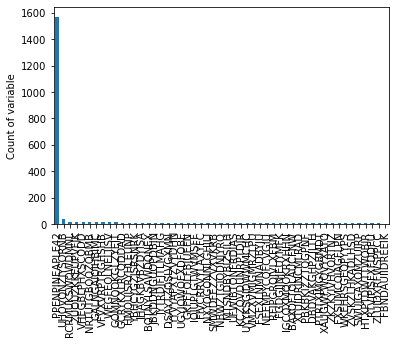

In [35]:
#to plot a graph to visualize our first categorical variable "MS_enc"
df['MS_enc'].value_counts().plot(kind='bar')
plt.ylabel('Count of variable')
plt.show()

From the graph above, we can see that majority of the values in variable "MS_enc" falls under the first category "PPENPINEAPLE42". It shows that almost 1600 data values fall under this category, which forms about 80% of our total observations. 

Hence, we can possibly convert this categorical variable into a numerical by one-hot encoding - where data values with "PPENPINEAPLE42" will be encoded as 1 and any other data values will be encoded as 0. 

In [36]:
#to define the dominant category
main_value = 'PPENPINEAPLE42'

#to create a new binary column
df['MS_enc_binary'] = df['MS_enc'].apply(lambda x: 1 if x == main_value else 0)

#to drop the original categorical column to avoid confusion
df = df.drop(columns=['MS_enc'])

#to confirm if our hot-encoding has been done successfully
print(df['MS_enc_binary'])

0       1
1       1
2       1
3       0
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    1
Name: MS_enc_binary, Length: 2000, dtype: int64


```python
2) Analysing second categorical variable - "SMIF"
```

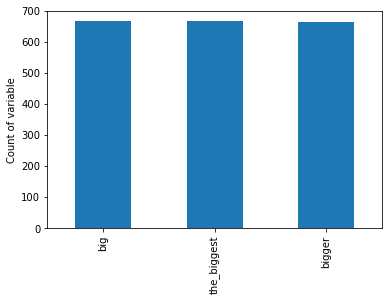

In [37]:
#to plot a graph to visualize our second categorical variable "SMIF"
df['SMIF'].value_counts().plot(kind='bar')
plt.ylabel('Count of variable')
plt.show()


From the graph above, we can see that there are 3 main categories - "big", "bigger" and "the biggest", with relatively equal number of observations. 

We can also possibly convert this categorical variable into a numerical variable by one-hot encoding - where data values are encoded from 1 to 3, with increasing size (i.e. from big to the biggest)

In [38]:
#to define mapping for the values
value_mapping = {'the_biggest': 3, 'bigger': 2, 'big': 1}

#to create a new numerical variable
df['SMIF_numeric'] = df['SMIF'].map(value_mapping)

#to drop the original categorical column to avoid confusion
df = df.drop(columns=['SMIF'])

#to confirm if our hot-encoding has been done successfully
print(df['SMIF_numeric'])

0       2
1       3
2       1
3       2
4       2
       ..
1995    3
1996    2
1997    2
1998    2
1999    2
Name: SMIF_numeric, Length: 2000, dtype: int64


``` python
3) Checking if our categorical variables have been converted successfully
```

In [39]:
numerical_columns = df.select_dtypes(include=[int,float]).columns
print(len(numerical_columns))

categorical_columns= df.select_dtypes('object').columns
print(len(categorical_columns))

550
0


In [40]:
numerical_columns

Index(['experimental_proprty', 'nHetero', 'nX', 'C2SP3', 'MPC5', 'ATS0i',
       'NaasN', 'SsCH3', 'nCl', 'nFAHRing',
       ...
       'ATSC2pe', 'SsCl', 'ATS6v', 'AATSC1dv', 'nFARing', 'AATS2v', 'Xp-7dv',
       'n6Ring', 'MS_enc_binary', 'SMIF_numeric'],
      dtype='object', length=550)

From our last two codes, we can see that all our variables have been converted to numerical variables. There are no other categorical variables in our datasets. We can also confirm that our new variables 'MS_enc_binary' and 'SMIF_numeric' have been included in the list of numerical columns.

### Section 5: Using Dimensionality Reduction - Principal Component Analysis (PCA) 

In [41]:
#to prepare our data for PCA by standardizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

#to create two dataframes - one with all feature variables and one with only the target variable
#we are doing this because we will only be doing standardization and PCA on the numerical variables (not the target variable)
df_minusTV = df.drop(columns=['experimental_proprty'])
df_onlyTV = df['experimental_proprty']

#to fit the scaler to data and transform it to a dataframe
df_scaled = scaler.fit_transform(df_minusTV)
df_scaled = pd.DataFrame(df_scaled, columns=([df_minusTV]))

#to check if standardization was done successfully
df_scaled.head()

,nHetero,nX,C2SP3,MPC5,ATS0i,NaasN,SsCH3,nCl,nFAHRing,SlogP_VSA6,...,ATSC2pe,SsCl,ATS6v,AATSC1dv,nFARing,AATS2v,Xp-7dv,n6Ring,MS_enc_binary,SMIF_numeric
0,0.121212,0.111111,0.000000,0.295455,0.164181,0.25,0.088835,0.333333,0.0,0.356809,...,0.128199,0.323306,0.136351,0.682193,0.0,0.395653,0.211331,0.500000,1.0,0.5
1,0.303030,0.000000,0.111111,0.412879,0.233704,0.00,0.194307,0.000000,0.5,0.303599,...,0.311345,0.000000,0.251962,0.622422,0.5,0.406668,0.441439,0.500000,1.0,1.0
2,0.121212,0.111111,0.074074,0.242424,0.118591,0.00,0.060021,0.333333,0.5,0.262561,...,0.151786,0.340058,0.145515,0.607841,0.5,0.486505,0.256785,0.333333,1.0,0.0
3,0.242424,0.111111,0.111111,0.378788,0.166776,0.00,0.000000,0.333333,0.5,0.267607,...,0.151754,0.322316,0.172841,0.518422,0.5,0.552248,0.272298,0.333333,0.0,0.5
4,0.181818,0.000000,0.074074,0.238636,0.219655,0.25,0.410676,0.000000,0.0,0.223006,...,0.258145,0.000000,0.191736,0.802522,0.0,0.313227,0.115247,0.166667,1.0,0.5


In [42]:
#to perform PCA on our scaled data
from sklearn.decomposition import PCA
pca = PCA(0.95) #have set the threshold for variance to be 0.95, which would be capture 95% of the total variance
x = pca.fit_transform(df_scaled)
pca_ratio = pca.explained_variance_ratio_
print(pca_ratio)

[0.24456254 0.12511447 0.07183932 0.06008581 0.04129531 0.03276261
 0.0305404  0.0275913  0.02325124 0.02061363 0.0180915  0.01662509
 0.01647791 0.01512048 0.01395802 0.01238065 0.01211322 0.01171108
 0.01026682 0.00989893 0.00906152 0.00816946 0.00799848 0.00719892
 0.00605119 0.00591701 0.00582107 0.0055726  0.00498766 0.00489869
 0.00454861 0.00432242 0.00415523 0.00393327 0.00378639 0.00350052
 0.00341852 0.00333996 0.00318747 0.00294587 0.00280531 0.00269397
 0.00261709 0.00251867 0.00242413 0.00229505 0.00225686 0.00218392
 0.00210082 0.00206789 0.00194253 0.00188695 0.00182662 0.00180033
 0.00172461]


In [43]:
#to find the number of components needed to achieve a 0.95 variance
len(pca_ratio)

55

In [44]:
#to convert our ratios to percentage values for ease of computation
per_pcaratio = [(x*100) for x in pca_ratio]
print(per_pcaratio)

[24.456253989460812, 12.511447013086496, 7.183932246791325, 6.008581253427363, 4.129530533919739, 3.276260769885574, 3.0540396583790805, 2.7591297270768185, 2.3251236277051737, 2.061362632868475, 1.8091501347862267, 1.6625094793016344, 1.647790590097695, 1.5120479552379067, 1.3958024012778272, 1.2380653389957812, 1.2113222721575638, 1.171107917854924, 1.026681523864586, 0.989893240234329, 0.9061519537903671, 0.816945918510192, 0.7998483803315656, 0.7198915122128349, 0.6051187595871875, 0.5917007023183783, 0.582107399980087, 0.5572601067155042, 0.4987659304792286, 0.489869035048101, 0.45486085661322, 0.4322420963073211, 0.4155225133022662, 0.393326784796787, 0.37863884378935475, 0.3500519472154373, 0.3418520343240685, 0.33399553038079255, 0.3187467295211921, 0.29458662799930296, 0.2805312072920718, 0.26939662896410416, 0.2617087662645835, 0.25186663016563904, 0.24241301643288418, 0.22950482080715162, 0.22568631297937994, 0.21839159893200163, 0.21008169196417703, 0.2067888329131297, 0.19

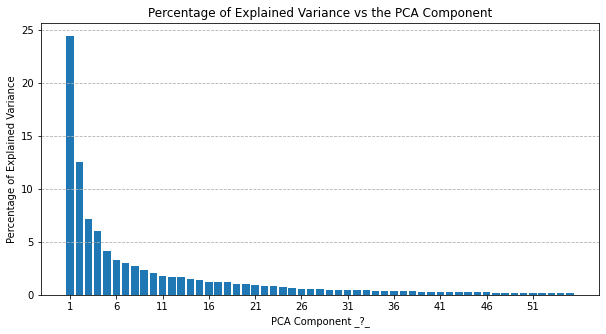

In [45]:
#to use data visualizon to see how this variance ratio will look like against the number of components through a barplot

components = np.arange(1, len(per_pcaratio) + 1) #creating the values for x-axis
plt.figure(figsize=(10, 5))
plt.bar(components, per_pcaratio)
plt.xlabel('PCA Component _?_')
plt.ylabel('Percentage of Explained Variance')
plt.title('Percentage of Explained Variance vs the PCA Component')
plt.xticks(components[0::5])  #to ensure there is no overcorwding of x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=1.0)
plt.show()

From the above, we generally can see a decreasing trend where the percentage of explained variance decreases as the number of PCA Components increase. But we should note that the sum of the explained variance of each PCA component will add up to 0.95 as we had specified in our previous PCA computation. 

It is also interesting to see how just one PCA component is able to capture a significant amount of the total variance in your data (close to 30% of the total variance). This can be considered a key variable in our analysis and there is a possibility that this component is a linear combination of the original variables that contributes substantially to the overall variance in your data.

As we can see from the graph above, the next PCA component is only able to capture about less than 10% of the variance, and the percentage decreases as the number of PCA components increase.

In [46]:
#to calculate the cumulative percentage of variance ratio
persum_pcaratio = []
accumulated_value = 0

for i in per_pcaratio:
    accumulated_value += i
    persum_pcaratio.append(accumulated_value)

print(persum_pcaratio)

[24.456253989460812, 36.96770100254731, 44.15163324933863, 50.160214502765996, 54.28974503668574, 57.56600580657131, 60.620045464950394, 63.37917519202721, 65.70429881973239, 67.76566145260087, 69.57481158738709, 71.23732106668872, 72.88511165678642, 74.39715961202432, 75.79296201330216, 77.03102735229794, 78.2423496244555, 79.41345754231043, 80.440139066175, 81.43003230640933, 82.3361842601997, 83.15313017870989, 83.95297855904145, 84.6728700712543, 85.27798883084148, 85.86968953315986, 86.45179693313995, 87.00905703985545, 87.50782297033467, 87.99769200538277, 88.452552861996, 88.88479495830332, 89.30031747160558, 89.69364425640237, 90.07228310019173, 90.42233504740716, 90.76418708173122, 91.09818261211201, 91.4169293416332, 91.71151596963252, 91.99204717692459, 92.26144380588869, 92.52315257215328, 92.77501920231892, 93.0174322187518, 93.24693703955894, 93.47262335253832, 93.69101495147032, 93.9010966434345, 94.10788547634763, 94.30213860333497, 94.4908334914308, 94.67349540677081, 

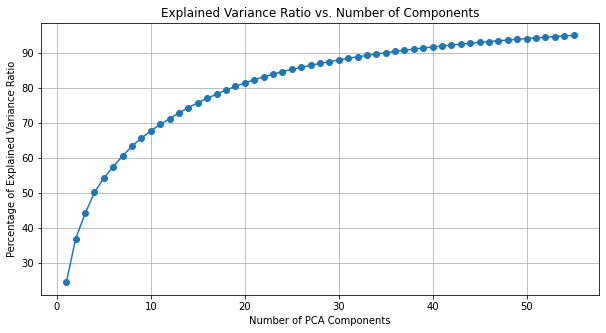

In [47]:
#to plot the cumpulative percentage of explained variance against the number of components:
n_components = np.arange(1, len(pca_ratio) + 1)
plt.figure(figsize=(10, 5))
plt.plot(n_components, persum_pcaratio, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Percentage of Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


Our previous observation is also further substatiated by the graph above. 

The slope of the graph represents the rate at which the explained vatiance increases as we add more PCA components. Initially, you can see that the slope of the graph is steep, and it slowly becomes more gradual. This means that at initial stages, each additional component contributes significantly to explaining the variance. While the graph gets more gradual, it shows that each additional component has diminishing contributions.

We can also see that at variance of 95%, the slope is starting to roughly flatten out. Any increase in PCA components further would only lead to a very small increase in variance. As such, 0.95 variance is a good threshold and we will retain that threshold for our PCA Analysis. 

In [48]:
#to create a dataframe with just the first two PCA components to prepare for our 2D Scatterplot
pca_df = pd.DataFrame(data={'PCA1': x[:, 0], 'PCA2': x[:, 1], 'Target': df_onlyTV})
print(pca_df)

          PCA1      PCA2  Target
0    -0.196751  0.548587    3.54
1     1.312752 -0.775096   -1.18
2    -0.917144  0.289511    3.69
3     0.350704  1.138800    3.37
4    -0.133901 -0.349427    3.10
...        ...       ...     ...
1995  1.793151  0.706845    2.06
1996 -0.600888 -1.089645    3.03
1997  0.144587 -1.082060    3.80
1998  0.136440  1.254714    3.22
1999  0.117597  0.431925    1.75

[2000 rows x 3 columns]


In [49]:
#to find the percentage variance captured by the first two PCA components for reference
persum_pcaratio[1] 

36.96770100254731

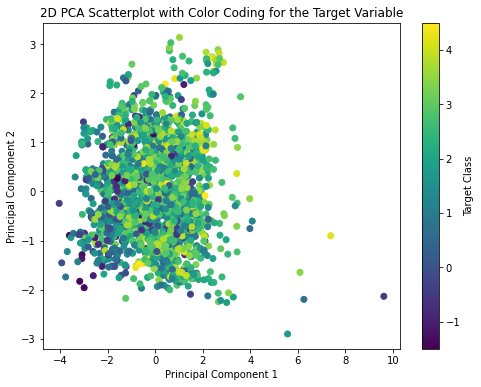

In [50]:
#to create a 2D scatterplot with color-coding by the target variable
plt.figure(figsize=(8, 6))
plt.scatter(x=pca_df['PCA1'], y=pca_df['PCA2'], c=pca_df['Target'], cmap='viridis')
plt.colorbar(label='Target Class')
plt.title('2D PCA Scatterplot with Color Coding for the Target Variable')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The 2D Scatterplot produced above is a bit hard to visualize given the 1) overlaps of points and 2) the subjective nature of the colour gradient which makes it challenging to interpret. This makes the plot inaccessible, especially for colour blind individuals (like me!). 

As such, we will convert the target variable from a numerical variable to categorial variable through Custom Binning. This will reduce the number of colours used in the 2D scatterplot, making it more distinct and easier for interpretation.

In [51]:
#to convert our target variable from numerical to categorical type
def custom_binning(target):
    if -2 <= target < 0:
        return 'Value between -2 and 0'
    elif 0 <= target < 2:
        return 'Value between 0 and 2'
    elif 2 <= target < 4:
        return 'Value between 2 and 4'
    elif target >= 4:
        return 'Value more than 4'
    else:
        return 'check result'
    
pca_df['Target_Cat'] = pca_df['Target'].apply(custom_binning)

In [52]:
#to check if our new column displaying the categorical version of our target variable is included
print(pca_df)

          PCA1      PCA2  Target              Target_Cat
0    -0.196751  0.548587    3.54   Value between 2 and 4
1     1.312752 -0.775096   -1.18  Value between -2 and 0
2    -0.917144  0.289511    3.69   Value between 2 and 4
3     0.350704  1.138800    3.37   Value between 2 and 4
4    -0.133901 -0.349427    3.10   Value between 2 and 4
...        ...       ...     ...                     ...
1995  1.793151  0.706845    2.06   Value between 2 and 4
1996 -0.600888 -1.089645    3.03   Value between 2 and 4
1997  0.144587 -1.082060    3.80   Value between 2 and 4
1998  0.136440  1.254714    3.22   Value between 2 and 4
1999  0.117597  0.431925    1.75   Value between 0 and 2

[2000 rows x 4 columns]


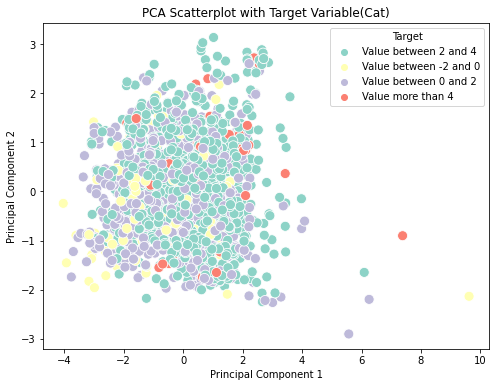

In [53]:
#to recreate a 2D scatterplot with color-coding by the target variable (but in this case categorical version)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Target_Cat', data=pca_df, palette='Set3', s=100)
plt.title('PCA Scatterplot with Target Variable(Cat)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()

From our 2D Scatterplot above, we can make the following observations:

1) When both our PCA components are negative, the values of our target variable seem to be negative as well. This can be observed from the clustering of yellow points (values less than 0) at the bottom left portion of the graph.
2) When both our PCA componenets are high, we also see that the values of our target variable seem to be higher. This can be oberseved from the clustering of red points (values more than 4) at the top right portion of the graph.

### Section 6: Using Non-Linear Dimensionality Reduction - tSNE

In [54]:
#to perform tSNE on our scaled data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2) #setting components =2, to be used for our 2D scatterplot
x2 = tsne.fit_transform(df_scaled)
tsne_df = pd.DataFrame(data={'tSNE1': x2[:, 0], 'tSNE2': x2[:, 1], 'Target': df_onlyTV, 'Target_Cat': pca_df['Target_Cat']})

print(tsne_df)


          tSNE1      tSNE2  Target              Target_Cat
0    -11.272371  46.998859    3.54   Value between 2 and 4
1     -2.445103 -42.619202   -1.18  Value between -2 and 0
2     16.899057  18.130228    3.69   Value between 2 and 4
3      0.989769  72.610619    3.37   Value between 2 and 4
4      4.387193  14.140304    3.10   Value between 2 and 4
...         ...        ...     ...                     ...
1995 -44.085087  -3.938087    2.06   Value between 2 and 4
1996  18.859253 -28.689148    3.03   Value between 2 and 4
1997  12.361142 -33.240070    3.80   Value between 2 and 4
1998   1.455513  72.599014    3.22   Value between 2 and 4
1999   9.127054  19.593584    1.75   Value between 0 and 2

[2000 rows x 4 columns]


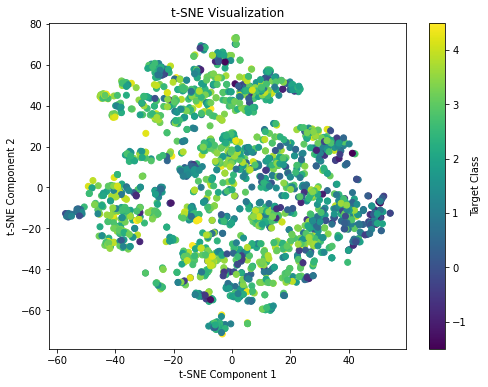

In [55]:
#to create a scatterplot to visualize the t-SNE results(numerical version)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c=tsne_df['Target'])
plt.colorbar(label='Target Class')
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Similar to our initial PCA Scatterplot, this plot is a bit hard to visualize. Hence, we will adopt the same technique as previously and do the color coding with our categorial target variable. 

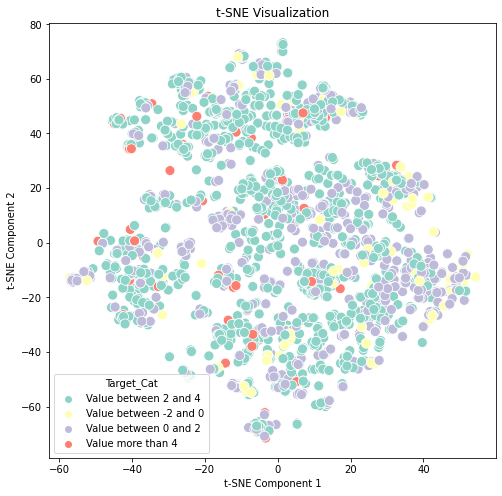

In [56]:
#to create a scatterplot to visualize the t-SNE results(categorial version)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=tsne_df['tSNE1'], y=tsne_df['tSNE2'], hue='Target_Cat', data=tsne_df, palette='Set3', s=100)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

The tSNE Visualization Plot generally looks similar to the PCA plot we had above. While we could deduce some sort of trend/clustering in the PCA plot, we are unable to do so for the tSNE graph. 

While we do see some clustering of yellow points (i.e. values where the target variable is less than zero) in the middle left section of the graph, it does not demonstrate any significant trend.

An "ideal" t-SNE or PCA graph would have show a clear separation between the clusters (in this case, would be the different categories we have created for our target variable.). However, in our analysis we can see that we were not able to show any clear separation using both the linear and non-linear dimensionality reduction techniques. Some possible reasons could be:

1) An inadequate number of components - perhaps if we can include more components/dimensions, we may be able to see a better separation
2) Possible noise in the data, if the dataset contains a significant amount of noise or variability, it can affect our results and make it difficult to observe the sepeartion effectively.

To overcome this, we can perhaps explore alternative dimensionality reduction techniques or data preprocessing strategies. 

### Section 7: Using Linear Regression to find the most important variable 

In [57]:
#to perform linear regression on our scaled data
from sklearn.linear_model import LinearRegression

#to fit the dataset to a linear model
model = LinearRegression()
model.fit(df_scaled, df_onlyTV)

#to calculate the coefficients of the different variables
coefficients = model.coef_
feature_names = list(df_scaled.columns)

In [58]:
# to create a DataFrame to display the coefficients and their corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df

,Feature,Coefficient
0,"(nHetero,)",2.139393e+11
1,"(nX,)",-7.666677e+09
2,"(C2SP3,)",1.334782e+01
3,"(MPC5,)",1.160278e+08
4,"(ATS0i,)",2.081626e+10
...,...,...
544,"(AATS2v,)",2.891943e+01
545,"(Xp-7dv,)",5.361486e-01
546,"(n6Ring,)",-8.247039e-01
547,"(MS_enc_binary,)",-4.875338e-02


In [59]:
#to also include the absolute values of the coefficients so that when we sort the values by coefficients, the negative values are considered as well.
coef_df['Abs_Coefficient'] = abs(coefficients) 
print(coef_df)

              Feature   Coefficient  Abs_Coefficient
0          (nHetero,)  2.139393e+11     2.139393e+11
1               (nX,) -7.666677e+09     7.666677e+09
2            (C2SP3,)  1.334782e+01     1.334782e+01
3             (MPC5,)  1.160278e+08     1.160278e+08
4            (ATS0i,)  2.081626e+10     2.081626e+10
..                ...           ...              ...
544         (AATS2v,)  2.891943e+01     2.891943e+01
545         (Xp-7dv,)  5.361486e-01     5.361486e-01
546         (n6Ring,) -8.247039e-01     8.247039e-01
547  (MS_enc_binary,) -4.875338e-02     4.875338e-02
548   (SMIF_numeric,)  3.242769e-01     3.242769e-01

[549 rows x 3 columns]


In [60]:
coef_df1 =coef_df.sort_values(by="Abs_Coefficient", ascending=False)
print(coef_df1)

              Feature   Coefficient  Abs_Coefficient
263             (nC,)  3.077228e+11     3.077228e+11
0          (nHetero,)  2.139393e+11     2.139393e+11
136             (Sp,) -1.042844e+11     1.042844e+11
467           (apol,) -1.042843e+11     1.042843e+11
498        (nBondsO,) -8.875619e+10     8.875619e+10
..                ...           ...              ...
105           (MIF4,)  6.616881e-02     6.616881e-02
547  (MS_enc_binary,) -4.875338e-02     4.875338e-02
506        (n9FRing,)  3.808832e-02     3.808832e-02
508         (ATSC8d,) -3.212738e-02     3.212738e-02
420         (piPC10,)  6.987572e-03     6.987572e-03

[549 rows x 3 columns]


In [61]:
#to calculate the correlation for our target variable and variable 'Si'
Si_corr = np.corrcoef(df['experimental_proprty'], df['Si'])
Si_corr

array([[1.        , 0.15152428],
       [0.15152428, 1.        ]])

For Linear Regression, the coefficient reflects the strength and direction of the linear relationship between a predictor variable and the target variable. From the table, we can see that variable "Si" is the most important variable in predicting the target variable. 

Given that "Si" has the largest coefficient, we can infer that "Si" has the strongest linear relationship with our target variable "experimental_proprty". This means that any changes in this variable can have a significant effect on the predicted values of our target variable. We can also note that the coefficient for "Si" is more than double of the next highest coefficient, which is for variable "ATS0i". This reflects the significance of this feature variable on our target variable.

Moreover, looking at the coefficient value, we can also see that the coefficient for "Si" is negative. This means that "Si" has a negative linear relationship with our target variable. This means that, as the value of "Si" increases, the value of our target variable is expected to decrease significantly. 

However, we should also take note that although the linear regression coefficient for "Si" is very high, the correlation coefficient is low. This could suggest that while there might be a significant relationship between the variables, it may not be linear. Hence, a linear model may not be appropriate for capturing the relationship between the variables.

This is something we must take note when doing predictive modeling in the future. 

### Summary

For this EDA Assignment, we have covered various components and techniques to gain insights into a dataset. 

1) We start off by loading the dataset into Python, and inspecting the dataset to understand its structure and content. Examples include checking the size of the data, identifying data types, examining the summary statistics of the data etc. 2

2) Then we proceeded to clean and prepare the data for analysis, by addressing issues such as duplicates, erroneous data, missing values and outliers. We also did some preprocessing work like scaling and encoding categorical variables.

3) Following which, we also did some bivariate analysis, where we investigated the relationships between pairs of variables through correlation analysis. 

4) We also performed multivatiate analysis some dimensionality reduction techniques - both linear (PCA) and non-linear(tSNE) to help visualize the high-dimensional data. We also used data visualization techniques to create plots to effecitvely demonstrate the outputs. 

5) As a bonus, we also did featue selection through linear regression, where we investigated the most important feature/varibale in our analysis that can be used to predict our targer variable. 

Since we do not have much info/context of the dataset, there is not much conclusions and interpretations that we could make from our analysis. But what we have done so far through EDA, would be a good foundation for more advanced data analysis and modeling in the future. 
